#ALRIGHT WILL 
##IT'S MONDAY. YOU'RE GONNA SPEND 20 MINUTES LOOKING AT THIS CODE UNABLE TO FIGURE OUT WHAT THE FUCK YOU WERE DOING. I'M HERE TO HELP. 

###The last thing you looked at was a list of the vocabulary sorted by coefficient magnitude for a logistic regression model; this is towards the top of the workbook. 

###What you need to do next is to CHANGE how you're calculating the word count vectors you're using; you were originally subtracting 'against the motion' from 'for the motion' -- you WANT to make it so that it's 'winner' minus 'loser'; this will make your vocabulary and coefficients much more intelligible. 

###After that, look at the features and plot their coefficients -- does it tell you anything? 

###There are still a few additional things you need to incorporate into your model -- the number of women speaking, POS/syntax. REFER TO THE YELLOW NOTEBOOK. 

In [82]:
import processing
import pandas as pd
import string 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize

from sklearn.naive_bayes import MultinomialNB

%matplotlib inline

In [2]:

names_and_win = [('campus_assault.txt', [0, 1], [(0, 1), (1, 0)]), ('samesex.txt', [0, 1], [(0, 0), (0, 0)]), ('iran_deal.txt', [0, 1], [(0, 0), (0, 0)]),\
('death_penalty.txt', [0, 1], [(1, 0), (0, 0)]), ('constitutional_authority.txt', [0, 1], [(0, 1), (0, 0)]), ('right_to_forget.txt', [0, 1], [(0, 0), (0, 0)]), \
('liberals_stifling.txt', [1, 0], [(0, 1), (0, 0)]), ('declinists.txt', [1, 0], [(0, 0), (1, 0)]), ('amazon.txt', [0, 1], [(0, 0), (0, 0)]), ('gmos.txt', [1, 0], [(0, 1), (0, 1)]), \
('eutha.txt', [0, 1], [(0, 0), (1, 0)]), \
('income_inequal.txt', [0, 1], [(1, 0), (0, 0)]), ('mass_collection.txt', [1, 0], [(0, 1), (0, 0)]), ('flexing_musc.txt', [1, 0], [(0, 0), (0, 0)]), ('common_core.txt', [1, 0], [(1, 0), (1, 0)]), \
('pacs.txt', [0, 1], [(0, 1), (0, 1)]), ('death_not_final.txt', [0, 1], [(0, 0), (0, 0)]), ('millenials.txt', [1, 0], [(1, 0), (0, 1)]), ('lecture_obsolete.txt', [1, 0], [(0, 0), (0, 1)]), \
('russia.txt', [0, 1], [(0, 0), (0, 0)]), ('USA_kill.txt', [1, 0], [(0, 0), (0, 1)]), ('affirmative.txt', [1, 0], [(1, 0), (0, 0)]), ('snowden.txt', [1, 0], [(0, 0), (0, 0)]), ('obamacare.txt', [1, 0], [(0, 1), (0, 0)]), \
('eat_face.txt', [1, 0], [(0, 0), (0, 0)]), ('spy_on_me.txt', [0, 1], [(0, 0), (0, 0)]), ('right_to_bear.txt', [1, 0], [(0, 0), (0, 0)]), ('take_job_anywhere.txt', [0, 1], [(0, 0), (1, 0)]), \
('red_state.txt', [1, 0], [(0, 0), (0, 0)]), ('break_up_banks.txt', [0, 1], [(0, 0), (0, 0)]), ('drones.txt', [0, 1], [(0, 0), (0, 0)]), ('us_syria.txt', [1, 0], [(0, 0), (0, 0)]), \
('pentagon_budget.txt', [0, 1], [(0, 0), (0, 1)]), ('fda_caution.txt', [1, 0], [(0, 0), (0, 0)]), ('gop_center.txt', [0, 1], [(0, 0), (1, 0)]), ('minimum_wage.txt', [0, 1], [(0, 0), (0, 1)]), \
('strong_dollar.txt', [1, 0], [(0, 0), (0, 0)]), ('prohibit_genetic.txt', [0, 1], [(0, 0), (1, 0)]), ('nuclear_iran.txt', [0, 1], [(0, 0), (0, 0)]), ('science_god.txt', [1, 0], [(0, 0), (0, 0)]), \
('legalize_drugs.txt', [1, 0], [(0, 0), (0, 0)]), ('rich_taxed.txt', [0, 1], [(0, 0), (0, 0)]), ('end_of_life_care.txt', [1, 0], [(0, 0), (0, 1)]), ('elected_islamists.txt', [0, 1], [(0, 0), (0, 0)]),\
('money_politics_overregulated.txt', [0, 1], [(0, 0), (0, 0)]), ('natural_gas_bad.txt', [1, 0], [(1, 1), (0, 1)]), ('ban_football.txt', [1, 0], [(0, 0), (0, 0)]), \
('internet_closing_minds.txt', [1, 0], [(0, 0), (0, 0)]), ('china_capitalism_better.txt', [0, 1], [(0, 0), (0, 0)]), ('obesity_govt_business.txt', [0, 1], [(1, 0), (0, 0)]), \
('palestine_statehood.txt', [1, 0], [(0, 0), (0, 0)]), ('no_religion.txt', [1, 0], [(0, 0), (0, 0)]), ('job_plan.txt', [1, 0], [(1, 0), (0, 0)]), ('too_many_kids_college.txt', [1, 0], [(0, 0), (0, 0)]), \
('grandmas_benefits.txt', [0, 1], [(1, 0), (0, 0)]), ('men_are_finished.txt', [1, 0], [(0, 1), (1, 0)]), ('end_war_on_terror.txt', [0, 1], [(0, 1), (0, 0)]), \
('freedom_press_state.txt', [0, 1], [(0, 0), (0, 0)]), ('dont_give_us.txt', [1, 0], [(0, 0), (1, 0)]), ('clip_americas_wings.txt', [1, 0], [(0, 0), (0, 0)]), \
('clean_energy.txt', [0, 1], [(0, 1), (0, 0)]), ('two_party_bad.txt', [0, 1], [(0, 1), (0, 0)]), ('repeal_obamacare.txt', [0, 1], [(0, 0), (0, 0)]), ('airports_profiling.txt', [1, 0], [(0, 0, 1), (0, 1, 0)]), \
('afghanistan_lost.txt', [0, 1], [(0, 0), (0, 0)]), ('big_govt_stifling.txt', [1, 0], [(0, 0), (0, 1)]), ('islam_is_peace.txt', [0, 1], [(1, 0), (1, 0)]), \
('terrorists_enemy_combatants.txt', [0, 1], [(0, 0), (0, 0)]), ('cyber_war_exaggerated.txt', [0, 1], [(0, 0), (0, 0)]), ('obamas_policy_us_decline.txt', [0, 1], [(0, 0), (0, 0)]), \
('organic_is_hype.txt', [0, 1], [(0, 0, 0), (0, 1, 0)]), ('teacher_unions_failing_schools.txt', [0, 1], [(1, 0, 1), (0, 0, 0)]), ('us_stepback_israel.txt', [1, 0], [(0, 0), (0, 0)]), \
('california_failed.txt', [1, 0], [(0, 0, 1), (0, 0, 0)]), ('us_mexico_drugs.txt', [1, 0], [(0, 0, 0), (0, 0, 0)]), ('obamas_policies_working.txt', [1, 0], [(0, 0, 0), (0, 0, 0)]), \
('good_riddance_mainstream.txt', [0, 1], [(0, 0, 0), (0, 0, 1)]), ('us_will_not_succeed_afghan.txt', [0, 1], [(0, 0, 0), (0, 0, 0)]), ('buy_american_bad.txt', [1, 0], [(0, 0, 1), (0, 0, 0)]), \
('diplomacy_iran_nowhere.txt', [0, 1], [(1, 0), (0, 0)]), ('pay_for_sex.txt', [1, 0], [(1, 1, 1), (1, 0, 0)]), ('blame_washington_financial.txt', [1, 0], [(0, 0, 0), (0, 0, 1)]), \
('art_market_ethical.txt', [1, 0], [(0, 0, 0), (1, 0, 0)]), ('carbon_reductions_not_worth_it.txt', [1, 0], [(0, 0, 0), (1, 0, 0)]), ('bush_is_worst.txt', [0, 1], [(0, 0), (0, 0)]), \
('google_dont_be_evil.txt', [1, 0], [(0, 0, 0), (1, 0, 0)]), ('guns_reduce_crime.txt', [1, 0], [(0, 0, 0), (0, 0, 0)]), ('america_winning_iraq.txt', [1, 0], [(0, 0), (0, 0)]), \
('universal_health.txt', [0, 1], [(0, 0, 0), (0, 1, 0)]), ('legalize_organs.txt', [1, 0], [(0, 1, 1), (0, 0, 0)]), ('islam_radicals.txt', [1, 0], [(0, 0, 1), (0, 0, 1)]), \
('tough_interrogation.txt', [0, 1], [(0, 1, 0), (0, 0, 0)]), ('america_policeman.txt', [1, 0], [(0, 0, 0), (0, 1, 0)]), ('performance_enhancing.txt', [1, 0], [(0, 0, 0), (0, 0, 0)]), \
('aid_africa_bad.txt', [0, 1], [(0, 0, 0), (0, 0, 1)]), ('end_affirmative.txt', [0, 1], [(0, 0, 0), (1, 1, 0)]), ('russia_enemy_again.txt', [0, 1], [(1, 0, 0), (1, 0, 0)]), \
('stop_welcoming_immigrants.txt', [1, 0], [(0, 0, 1), (0, 0, 1)]), ('spread_democracy_me.txt', [1, 0], [(0, 0, 0), (1, 1, 0)]), ('booming_china.txt', [0, 1], [(0, 0, 0), (0, 0, 0)]), \
('more_domestic_surveillance.txt', [0, 1], [(0, 0, 0), (0, 0, 1)]), ('global_warming_not.txt', [1, 0], [(0, 0, 0), (1, 0, 0)]), ('america_too_religious.txt', [1, 0], [(1, 0, 0), (1, 0, 0)]), \
('hollywood_anti_us.txt', [0, 1], [(0, 0, 0), (1, 0, 0)]), ('democratic_hamas.txt', [0, 1], [(0, 0, 0), (0, 0, 0)]), ('license_to_offend.txt', [1, 0], [(0, 0, 1), (0, 1, 1)]), \
('tolerate_iran.txt', [1, 0], [(0, 0, 0), (0, 0, 0)])]

In [3]:
df = pd.DataFrame(columns = ["For_text", "FL", "FA", "FP", "FS", \
                             "Against_text", "AL", "AA", "AP", "AS"])

i = 0
for document in names_and_win:
    
    df.loc[i] =  processing.parse_text('debate_text/'+document[0]) #/document
    i += 1 

    
all_text = []
for row in df['For_text']:
    all_text.append(row)

for row in df['Against_text']: 
    all_text.append(row)

all_text = [' '.join(item) for item in all_text]


for_the_motion_win_classification = []
for item in names_and_win: 
    for_the_motion_win_classification.append(item[1][0])

#who_won --> 0 means against the motion won, 1 means for the motion won

df['who_won'] = for_the_motion_win_classification

In [606]:
target = np.array(df['who_won'])

CV = CountVectorizer(ngram_range = (4,5), binary = True, min_df = .25)
CV_vectors = CV.fit_transform(all_text) * 1.
normalize(CV_vectors, axis=0, copy=False)

<214x25 sparse matrix of type '<type 'numpy.float64'>'
	with 1804 stored elements in Compressed Sparse Column format>

In [607]:
#win_minus_lose_vectors = []
#for index in range(len(for_the_motion_win_classification)): 
#    if for_the_motion_win_classification[index] == 0: 
#        win_minus_lose_vectors.append(np.array((CV_vectors[index+107]-CV_vectors[index]).todense())[0])
#    else: 
#        win_minus_lose_vectors.append(np.array(((CV_vectors[index]-CV_vectors[index+107]).todense()))[0])

#win_minus_lose_vectors = np.asmatrix(win_minus_lose_vectors)
win_minus_lose_vectors = CV_vectors[:107]-CV_vectors[107:]

In [608]:
win_minus_lose_vectors.shape

(107, 25)

In [609]:
#subtracted_cv_vectors = CV_vectors[0:107] + CV_vectors[107:]

In [610]:
#X_train, X_test, y_train, y_test = train_test_split(win_minus_lose_vectors, target)

#gnb = GaussianNB() 
#fittedgnb = gnb.fit(X_train, y_train)
#y_test_gnb = fittedgnb.predict(X_test)
#f1_score(y_test_gnb, y_test)

#mnb = MultinomialNB()
#fittedmnb = mnb.fit(X_train, y_train)
#y_test_mnb = fittedmnb.predict(X_test)
#f1_score(y_test_mnb, y_test)

In [611]:
lg = LogisticRegressionCV(penalty = 'l1', solver='liblinear')
fittedlg = lg.fit(X_train, y_train)
predicted_lg = fittedlg.predict(X_test)
f1_score(predicted_lg, y_test)

0.57142857142857151

##Subtract CV vectors; drop all features that only show up in one class; 
##add sentiment analysis to dataframe; 
##train test split, LR CV 

In [612]:
#subtracted_cv_vectors = CV_vectors[0:107] - CV_vectors[107:]
cv_df = pd.DataFrame(win_minus_lose_vectors.todense())
dropped_cv_df = cv_df.drop(list(cv_df.columns[(cv_df[target==0].sum(axis = 0) == 0)]), axis=1)
dropped_cv_df = dropped_cv_df.drop(list(dropped_cv_df.columns[(dropped_cv_df[target==1].sum(axis = 0) == 0)]), axis=1)

In [613]:
dropped_cv_df[['FL', 'FA', 'FP', 'FS', 'AL', 'AA', 'AP', 'AS']] = df[['FL', 'FA', 'FP', 'FS', 'AL', 'AA', 'AP', 'AS']]

In [614]:
#winner_females_minus_loser_females = []

#for index in range(len(names_and_win)):
#    if target[index] == 0: 
#        winner_females_minus_loser_females.append(sum(names_and_win[index][2][1]) - sum(names_and_win[index][2][0]))
#    else: 
#        winner_females_minus_loser_females.append(sum(names_and_win[index][2][0]) - sum(names_and_win[index][2][1]))

#dropped_cv_df['female_count'] = winner_females_minus_loser_females   

In [615]:
f1scores = []
randomarray = np.zeros(dropped_cv_df.shape[1])

for x in range(1): 
    X_train, X_test, y_train, y_test = train_test_split(np.array(dropped_cv_df), target)
    lg = LogisticRegressionCV(penalty = 'l1', solver='liblinear')
    fittedlg = lg.fit(X_train, y_train)
    predicted_lg = fittedlg.predict(X_test)
    f1scores.append(f1_score(predicted_lg, y_test))
    randomarray += fittedlg.coef_[0]


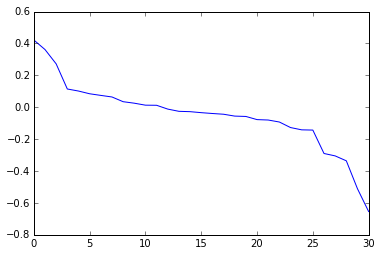

In [616]:
coefs = list(randomarray / 1.)
coefs.sort(reverse=True)
big_coefs = coefs[0:]
plt.plot(big_coefs)

In [617]:
important_vocab = [(key, index) for key, index in CV.vocabulary_.items() if index in dropped_cv_df.columns]

In [618]:
sorted_important_vocab = sorted(important_vocab, key = lambda x: x[1])
coefs_ = randomarray 
zipped_with_coefs = zip(sorted_important_vocab, coefs_)
zipped_with_coefs += zip(dropped_cv_df.columns[-9:], coefs_[-9:])

In [619]:
np.mean(f1scores)

0.53333333333333333

In [620]:
sorted(zipped_with_coefs, key = lambda x: abs(x[1]), reverse=True)

[((u'you look at the', 24), -0.65410125175267098),
 (24, -0.65410125175267098),
 ((u'one of the most', 13), -0.51124311491140928),
 ((u'thank you very much', 15), 0.42172650231330833),
 ((u'are going to be', 1), 0.3620039091156621),
 ((u'the united states and', 18), -0.33595905825626815),
 ((u'of the united states', 11), -0.30508574985363701),
 ((u'going to have to', 4), -0.28998514899438943),
 ((u'and by the way', 0), 0.27212909876671587),
 ((u'at the same time', 3), -0.14317333891844325),
 ((u'were not going to', 21), -0.14165174514605194),
 ((u'is going to be', 9), -0.12727109216228868),
 ('FS', 0.1145185030721365),
 ((u'if you look at', 5), 0.10173751244056846),
 ((u'the end of the', 16), -0.092561378681380188),
 ('FL', 0.084611606482972598),
 ('AL', -0.080065872487322595),
 ((u'if you want to', 7), -0.077466739105445381),
 ('AS', 0.07438015230426534),
 ('AP', 0.064517738773417391),
 ((u'one of the things', 14), -0.057692606862315782),
 ((u'to the united states', 20), -0.0554350793

#TFIDF VECTORIZATION

In [24]:
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_vectors = tfidf.fit_transform(all_text)

vector_differences = tfidf_vectors[0:107] - tfidf_vectors[107:214]

df['Vector_differences'] = list(vector_differences.todense())

In [25]:
X_train, X_test, y_train, y_test = train_test_split(vector_differences, target)
lg = LogisticRegressionCV(penalty = 'l1', solver='liblinear')
fittedlg = lg.fit(X_train, y_train)
predicted_lg = fittedlg.predict(X_test)
f1_score(predicted_lg, y_test)

0.31999999999999995

In [599]:
sum_of_aga_motion_tfidf_winners = sum(df[df['who_won']==0]['Vector_differences'])
aga_wins_avg_tfidf = sum_of_aga_motion_tfidf_winners/len(df[df['who_won']==0])

sum_of_for_motion_tfidf_winners = sum(df[df['who_won']==1]['Vector_differences'])
for_wins_avg_tfidf = sum_of_for_motion_tfidf_winners/len(df[df['who_won']==1])

cosim_to_aga_wins_avg_tfidf = linear_kernel(aga_wins_avg_tfidf, vector_differences)
cosim_to_for_wins_avg_tfidf = linear_kernel(for_wins_avg_tfidf, vector_differences)

df['cosim_to_for_wins'] = cosim_to_for_wins_avg_tfidf.reshape(107, 1)
df['cosim_to_aga_wins'] = cosim_to_aga_wins_avg_tfidf.reshape(107, 1)

In [9]:
similarity_to_for_the_motion = [] 
similarity_to_aga_the_motion = []

for x in range(107): 
    new_df = df[df.index != x]
    
    sum_aga = sum(new_df[new_df['who_won'] == 0]['Vector_differences'])
    aga_avg = sum_aga/len(new_df[new_df['who_won'] == 0])
    
    sum_for = sum(new_df[new_df['who_won'] == 1]['Vector_differences'])
    for_avg = sum_for/len(new_df[new_df['who_won'] == 1])
    
    similarity_to_for_the_motion.append(cosine_similarity(df['Vector_differences'][x], for_avg)[0][0])
    similarity_to_aga_the_motion.append(cosine_similarity(df['Vector_differences'][x], aga_avg)[0][0])

In [10]:
df['similarity_to_for_motion_avg'] = similarity_to_for_the_motion
df['similarity_to_aga_motion_avg'] = similarity_to_aga_the_motion

In [43]:
df.columns

Index([u'For_text', u'FL', u'FA', u'FP', u'FS', u'Against_text', u'AL', u'AA',
       u'AP', u'AS', u'who_won', u'Vector_differences',
       u'similarity_to_for_motion_avg', u'similarity_to_aga_motion_avg'],
      dtype='object')

In [73]:
X = df[['FP', 'FS', 'AP', 'AS']]

In [74]:
#X = df.drop(['For_text', 'Against_text', 'who_won', 'Vector_differences'], axis=1)

In [75]:
y = df['who_won']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [141]:
lr1 = LogisticRegression()

In [142]:
lr1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [143]:
lr1.score(X_test, y_test)

0.48148148148148145

In [144]:
y_hat = lr1.predict(X_test)

In [145]:
f1_score(y_test, y_hat)

0.46153846153846151

In [82]:
rf1 = RandomForestClassifier(n_estimators = 10000)
fittedrf = rf1.fit(X_train, y_train)
y_hat_rf = fittedrf.predict(X_test)
f1_score(y_test, y_hat_rf)

In [85]:
f1_score(y_test, y_hat_rf)

0.48275862068965519

In [38]:
jancsy_x = df[df['who_won']==0]['similarity_to_for_motion_avg']
jancsy_y = df[df['who_won']==0]['similarity_to_aga_motion_avg']

jancsy_x2 = df[df['who_won']==1]['similarity_to_for_motion_avg']
jancsy_y2 = df[df['who_won']==1]['similarity_to_aga_motion_avg']

In [39]:
import matplotlib.pyplot as plt 
%matplotlib inline 

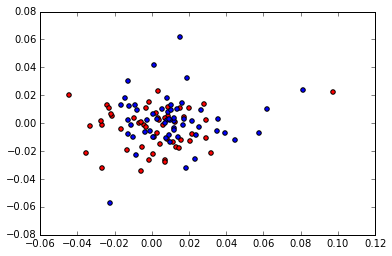

In [40]:
plt.figure(101) 
plt.scatter(jancsy_x, jancsy_y, c='red')
plt.scatter(jancsy_x2, jancsy_y2)